In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, confusion_matrix

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("perrin-freres-monthly-champagne-.csv")
df.dropna(inplace=True)
df.columns = ["Month", "Sales"]
df["Month"] = pd.to_datetime(df["Month"])
df["m"] = df["Month"].dt.month
df["y"] = df["Month"].dt.year
df.set_index("Month", inplace=True)
df

,Sales,m,y
Month,,,
1964-01-01,2815.0,1,1964
1964-02-01,2672.0,2,1964
1964-03-01,2755.0,3,1964
1964-04-01,2721.0,4,1964
1964-05-01,2946.0,5,1964
...,...,...,...
1972-05-01,4618.0,5,1972
1972-06-01,5312.0,6,1972
1972-07-01,4298.0,7,1972


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
 1   m       105 non-null    int64  
 2   y       105 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.3 KB


<AxesSubplot:xlabel='Month', ylabel='Sales'>

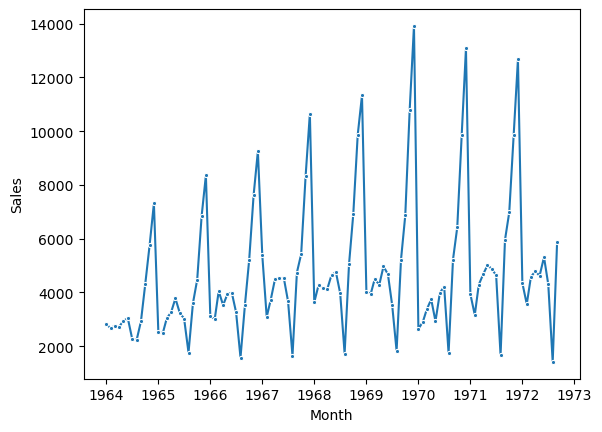

In [8]:
sns.lineplot(data=df["Sales"], marker=".")

In [5]:
df_m_y = df.pivot_table(index="y", columns="m", values="Sales")

In [6]:
sm.tsa.adfuller(df["Sales"])[1]*100  # Accept H0: data is not stationary

36.391577166024405

In [25]:
df["Trend"] = sm.tsa.seasonal_decompose(df["Sales"]).trend
sm.tsa.adfuller((df["Sales"] - df["Trend"]).dropna())[1]*100  # Accept Ha: data is stationary

0.03928268795282474

In [29]:
df["Sales_diff_lag1"] = df["Sales"] - df["Sales"].shift(1)
df["Sales_diff_lag12"] = df["Sales"] - df["Sales"].shift(12)
sm.tsa.adfuller(df["Sales_diff_lag1"].dropna())[1]*100, sm.tsa.adfuller(df["Sales_diff_lag12"].dropna())[1]*100

(2.5196204473868428e-08, 2.060579696813685e-09)

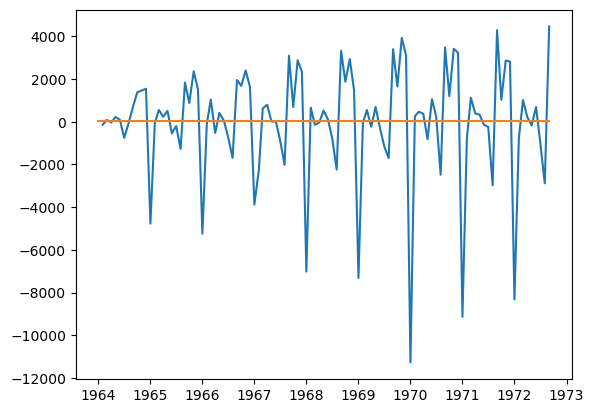

In [38]:
plt.plot(df["Sales_diff_lag1"])
plt.plot(df["Sales_diff_lag1"].index.values, [df["Sales_diff_lag1"].mean()]*df.shape[0])
plt.show()

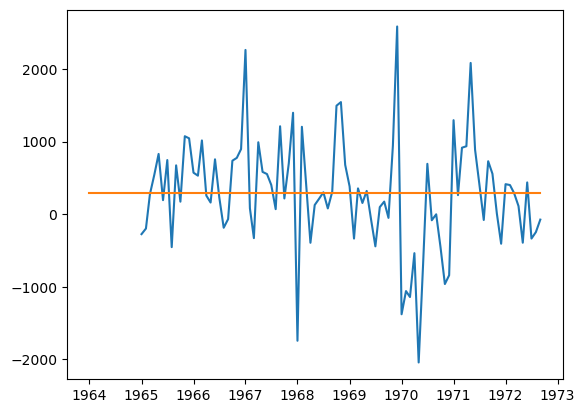

In [39]:
plt.plot(df["Sales_diff_lag12"])
plt.plot(df["Sales_diff_lag12"].index.values, [df["Sales_diff_lag12"].mean()]*df.shape[0])
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

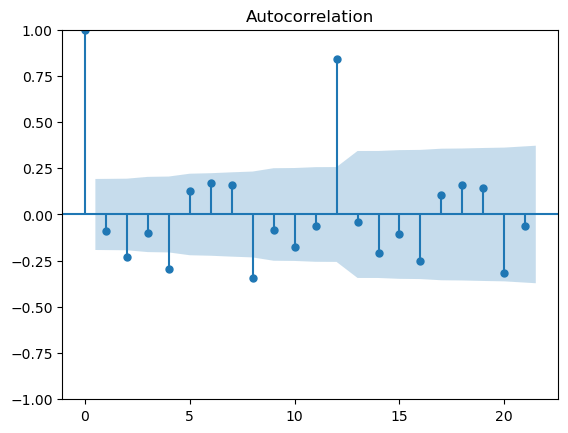

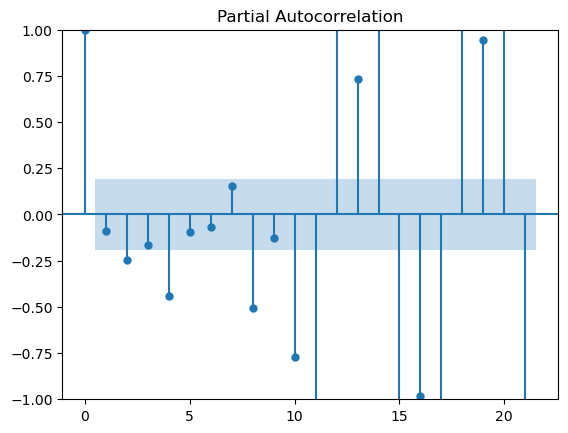

In [43]:
sm.graphics.tsa.plot_acf(df["Sales_diff_lag1"].dropna()), sm.graphics.tsa.plot_pacf(df["Sales_diff_lag1"].dropna())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

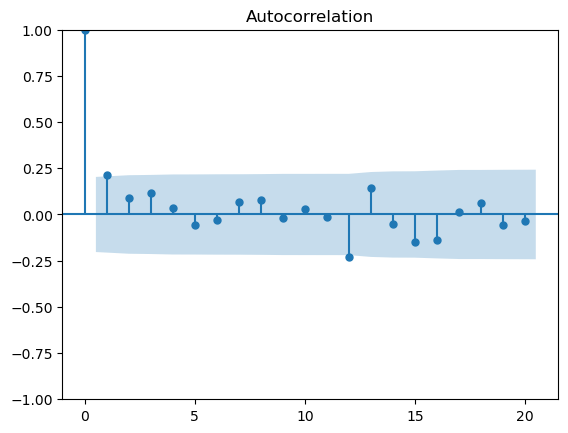

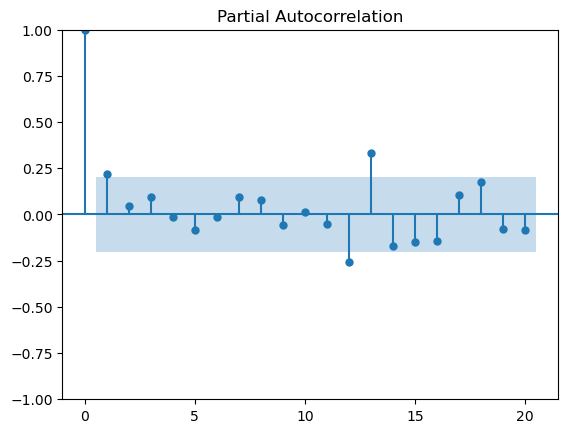

In [44]:
sm.graphics.tsa.plot_acf(df["Sales_diff_lag12"].dropna()), sm.graphics.tsa.plot_pacf(df["Sales_diff_lag12"].dropna())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 12 Jul 2023   AIC                           1911.627
Time:                        11:28:13   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.998      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.305      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.0

<AxesSubplot:xlabel='Month'>

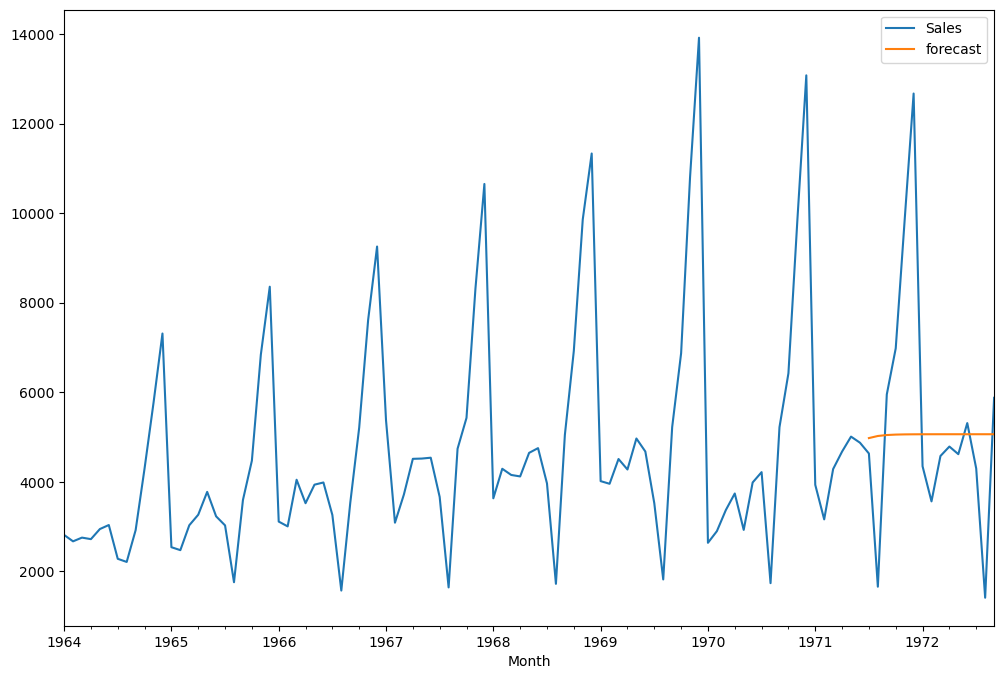

In [50]:
model = sm.tsa.ARIMA(df["Sales"], order=(1, 1, 1))
model_fitted = model.fit()
print(model_fitted.summary())

df['forecast'] = model_fitted.predict(start=90,end=105,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Wed, 12 Jul 2023   AIC                           1486.804
Time:                                    11:41:59   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043   

<AxesSubplot:xlabel='Month'>

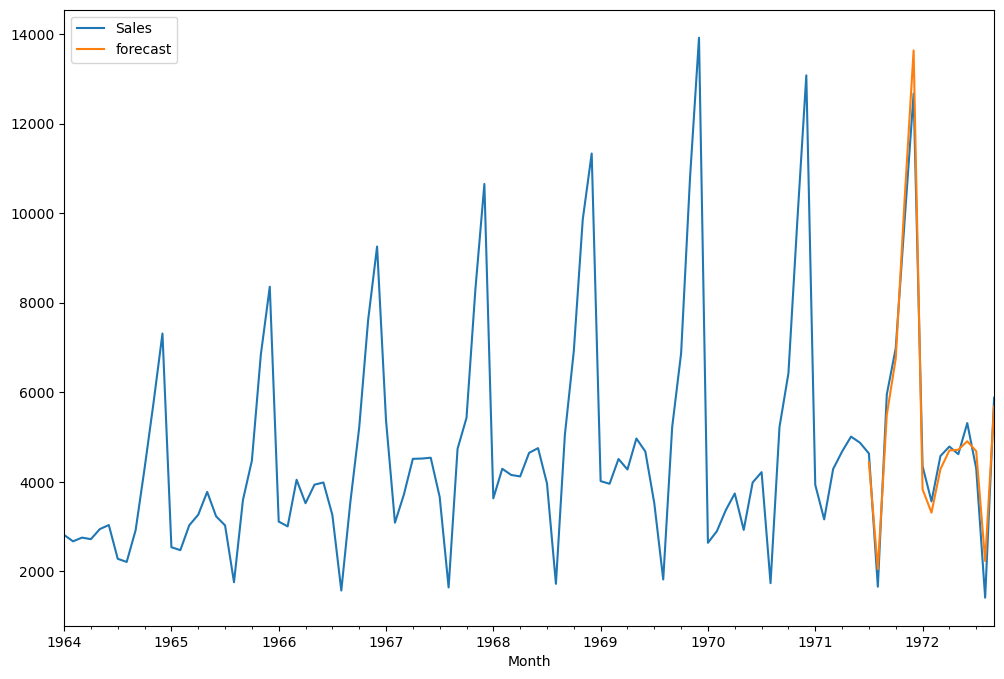

In [58]:
model = sm.tsa.SARIMAX(df["Sales"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fitted = model.fit()
print(model_fitted.summary())

df['forecast'] = model_fitted.predict(start=90,end=105,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Wed, 12 Jul 2023   AIC                           1486.804
Time:                                    11:47:02   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043   

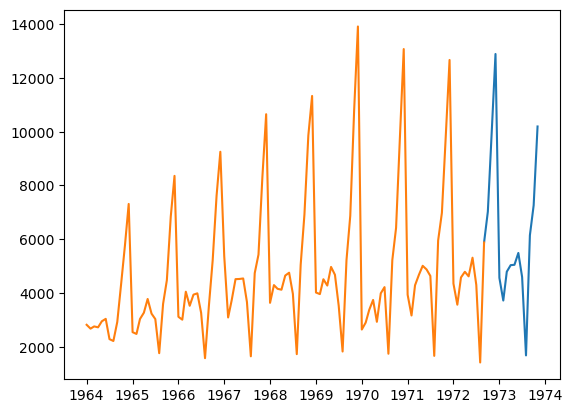

In [67]:
model = sm.tsa.SARIMAX(df["Sales"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fitted = model.fit()
print(model_fitted.summary())

x = model_fitted.predict(start=104,end=118,dynamic=True)
plt.plot(x)
plt.plot(df["Sales"])
plt.show()